<a href="https://colab.research.google.com/github/Miguel31Sa/Inteligencia-Artificial-MASS/blob/main/Practica2_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Práctica 2 - Perceptrón multicapa Fuente de datos personal

Tuve que realizarla con una pagina diferente ya que las paginas que me habian tocado ninguno tenia el archivo .data, hasta que encontre la de lenses que fue la que realice.

Últimas filas del conjunto de datos:
    ID  age  spectacle_prescription  astigmatic  tear_production_rate  class
19  20    3                       1           2                     2      1
20  21    3                       2           1                     1      3
21  22    3                       2           1                     2      2
22  23    3                       2           2                     1      3
23  24    3                       2           2                     2      3


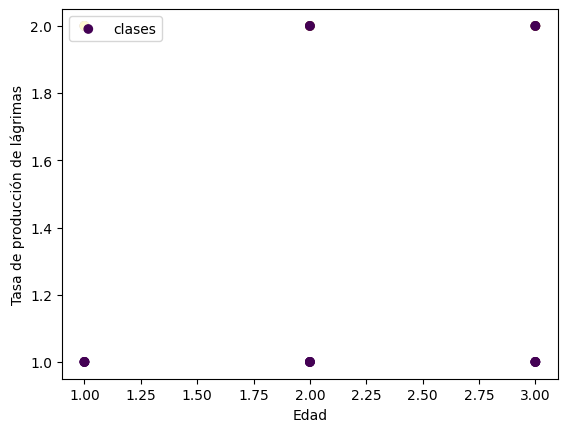

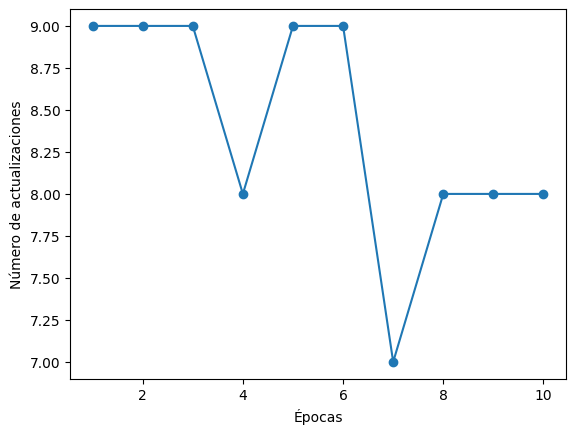

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1: Cargar el conjunto de datos "Lenses" y mostrar una tabla
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
df = pd.read_csv(url, sep='\s+', header=None, names=['ID', 'age', 'spectacle_prescription', 'astigmatic', 'tear_production_rate', 'class'])

# Mostrar las últimas filas del DataFrame
print("Últimas filas del conjunto de datos:")
print(df.tail())

# Parte 2: Preparar los datos para el Perceptrón
# Convertir las clases a valores binarios: 1 para clase 1 (lentes duros), -1 para las demás clases
y = np.where(df['class'] == 1, 1, -1)

# Usar las características "age" (edad) y "tear_production_rate" (tasa de producción de lágrimas)
X = df[['age', 'tear_production_rate']].values

# Parte 2: Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='clases')
plt.xlabel('Edad')
plt.ylabel('Tasa de producción de lágrimas')
plt.legend(loc='upper left')
plt.show()

# Parte 3: Definir la clase Perceptron
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Tasa de aprendizaje
        self.n_iter = n_iter  # Número de iteraciones (épocas)
        self.random_state = random_state  # Estado aleatorio para reproducibilidad

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver la clase predicha"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Parte 3: Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores por cada época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()
